In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-01-05 21:58:45.811402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [4]:
with open(data_dir + 'collocated_dict_5e_4.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,stress,ustar,yday,yyyy,lat,lon,s0_norm,s0,inc,az
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,0.390204,0.563065,101.590278,2018.0,44.6393,-124.30400,-8.857191,-11.019015,32.142569,280.917511
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,0.115201,0.304689,102.590278,2018.0,44.6393,-124.30400,-7.177506,-15.423333,42.147321,279.718414
2,-0.035293,-0.318466,277.445000,2476.984234,1020.763236,1021.990991,5.529764,5.616196,74.438348,73.498554,...,0.012453,0.100115,113.590278,2018.0,44.6393,-124.30400,-11.449438,-16.211901,32.153383,280.917114
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,0.141801,0.340280,114.590278,2018.0,44.6393,-124.30400,-7.653141,-16.376326,42.149543,279.718231
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,0.020953,0.130084,125.590277,2018.0,44.6393,-124.30400,-14.319081,-21.946009,32.146711,280.917053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,0.078067,-0.018678,257.135000,2491.579194,994.525701,995.769507,2.913308,2.980954,77.774753,76.929502,...,0.242337,0.439029,381.840972,2020.0,59.9337,-39.47378,-8.338825,-16.502153,40.544463,439.776978
731,0.078067,-0.018678,238.530001,2491.798855,999.285638,1000.545505,2.513606,2.630492,80.575903,79.902359,...,0.155034,0.349828,382.382639,2020.0,59.9337,-39.47378,-7.312949,-14.598001,40.734670,280.223206
732,0.078067,-0.018678,266.660001,2491.502372,1002.762277,1004.015002,2.848601,2.917305,75.022252,74.087723,...,0.221143,0.417898,382.840972,2020.0,59.9337,-39.47378,-10.154485,-14.697978,33.539960,438.030548
733,0.078067,-0.018678,270.814998,2491.549828,962.361582,963.543002,5.184460,5.180597,93.196652,93.172407,...,0.163293,0.368438,383.840972,2020.0,59.9337,-39.47378,-9.742783,-7.668073,25.541892,436.037079


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,stress,ustar,yday,yyyy,lat,lon,s0_norm,s0,inc,az
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,0.390204,0.563065,101.590278,2018.0,44.6393,-124.30400,-8.857191,-11.019015,32.142569,280.917511
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,0.115201,0.304689,102.590278,2018.0,44.6393,-124.30400,-7.177506,-15.423333,42.147321,279.718414
2,-0.035293,-0.318466,277.445000,2476.984234,1020.763236,1021.990991,5.529764,5.616196,74.438348,73.498554,...,0.012453,0.100115,113.590278,2018.0,44.6393,-124.30400,-11.449438,-16.211901,32.153383,280.917114
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,0.141801,0.340280,114.590278,2018.0,44.6393,-124.30400,-7.653141,-16.376326,42.149543,279.718231
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,0.020953,0.130084,125.590277,2018.0,44.6393,-124.30400,-14.319081,-21.946009,32.146711,280.917053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,0.078067,-0.018678,257.135000,2491.579194,994.525701,995.769507,2.913308,2.980954,77.774753,76.929502,...,0.242337,0.439029,381.840972,2020.0,59.9337,-39.47378,-8.338825,-16.502153,40.544463,439.776978
731,0.078067,-0.018678,238.530001,2491.798855,999.285638,1000.545505,2.513606,2.630492,80.575903,79.902359,...,0.155034,0.349828,382.382639,2020.0,59.9337,-39.47378,-7.312949,-14.598001,40.734670,280.223206
732,0.078067,-0.018678,266.660001,2491.502372,1002.762277,1004.015002,2.848601,2.917305,75.022252,74.087723,...,0.221143,0.417898,382.840972,2020.0,59.9337,-39.47378,-10.154485,-14.697978,33.539960,438.030548
733,0.078067,-0.018678,270.814998,2491.549828,962.361582,963.543002,5.184460,5.180597,93.196652,93.172407,...,0.163293,0.368438,383.840972,2020.0,59.9337,-39.47378,-9.742783,-7.668073,25.541892,436.037079


In [7]:
728*0.8

582.4

In [8]:
split_idx = 580

# Prepare features and labels

In [9]:
predictor_variables = ['s0', 'inc', 'az']

In [10]:
x = df[predictor_variables]
x

,s0,inc,az
0,-11.019015,32.142569,280.917511
1,-15.423333,42.147321,279.718414
2,-16.211901,32.153383,280.917114
3,-16.376326,42.149543,279.718231
4,-21.946009,32.146711,280.917053
...,...,...,...
730,-16.502153,40.544463,439.776978
731,-14.598001,40.734670,280.223206
732,-14.697978,33.539960,438.030548
733,-7.668073,25.541892,436.037079


In [11]:
y = - df['UWr'] * df['rhoair']
y

0      0.406533
1      0.086024
2     -0.000344
3      0.151889
4      0.023080
         ...   
730    0.244808
731    0.095376
732    0.295363
733    0.984020
734    0.592159
Length: 728, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [12]:
c = df['stress']

In [13]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [14]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [15]:
c_train = c[:split_idx]
c_test = c[split_idx:]

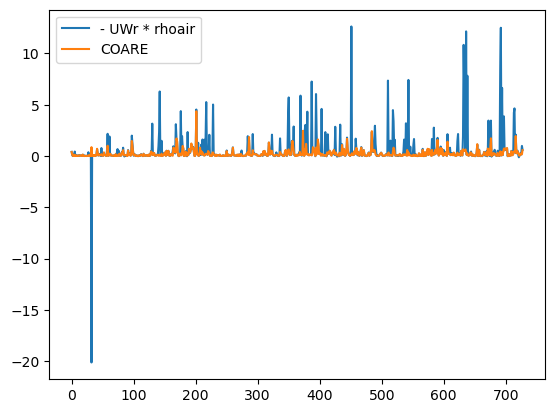

In [186]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE')
plt.legend()

# ML setup

In [16]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [17]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [18]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-01-05 22:00:59.969748: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-05 22:00:59.971787: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /modules/rhel8/nvhpc/22.2/Linux_x86_64/22.2/comm_libs/nvshmem/lib:/modules/rhel8/nvhpc/22.2/Linux_x86_64/22.2/comm_libs/nccl/lib:/modules/rhel8/nvhpc/22.2/Linux_x86_64/22.2/comm_libs/mpi/lib:/modules/rhel8/nvhpc/22.2/Linux_x86_64/22.2/math_libs/lib64:/modules/rhel8/nvhpc/22.2/Linux_x86_64/22.2/compilers/lib:/modules/rhel8/nvhpc/22.2/Linux_x86_64/22.2/compilers/extras/qd/lib:/modules/rhel8/cuda/11.6.0/extras/CUPTI/lib64:/modules/rhel8/cuda/11.6.0/lib64:/modules/rhel8/cuda/11.6.0/targets/x86_64-linux/lib
2023-01-05 22:00:59.971834: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR

Epoch 1/500
13/13 [==============================] - 1s 81ms/step - loss: 155435.7143 - mean_absolute_error: 386.0375 - val_loss: 158625.2031 - val_mean_absolute_error: 390.7362
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 149111.1016 - mean_absolute_error: 378.0231 - val_loss: 154240.0781 - val_mean_absolute_error: 385.2737
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 150469.2143 - mean_absolute_error: 380.0277 - val_loss: 149904.1719 - val_mean_absolute_error: 379.7954
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 141672.9029 - mean_absolute_error: 368.3823 - val_loss: 145719.4688 - val_mean_absolute_error: 374.4324
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 136616.2958 - mean_absolute_error: 361.6792 - val_loss: 141600.2969 - val_mean_absolute_error: 369.0779
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 136429.6362 - mean_absolute_error: 361.73

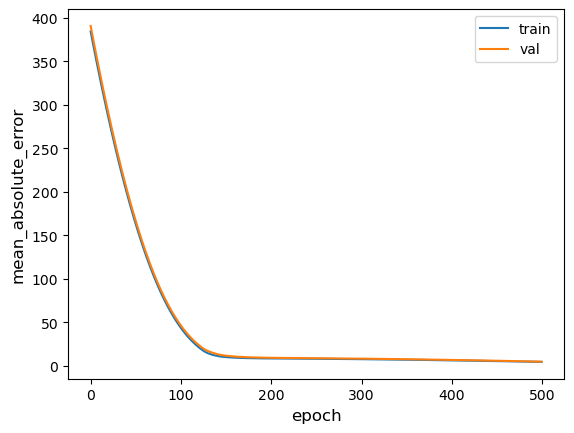

5/5 [==============================] - 0s 937us/step - loss: 30.4176 - mean_absolute_error: 4.6046
Test accuracy 4.604587078094482
Test loss 30.417625427246094


In [19]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [20]:
y_test_pred = multi_dense_model.predict(x_test)

In [21]:
np.mean(y_test)

0.9405065519903006

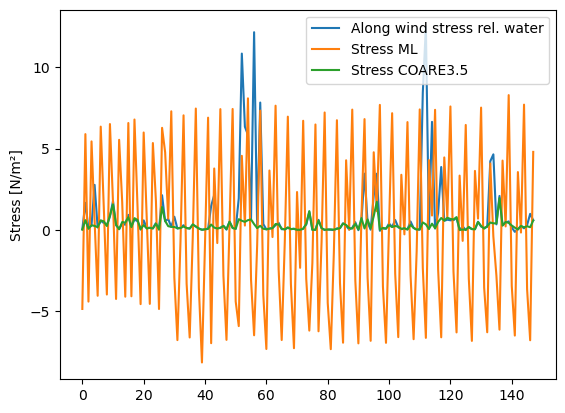

In [22]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [23]:
rmse(y_test.values, y_test_pred)

5.521140759692802

In [24]:
rmse(y_test.values, c_test)

2.1592411098777693

# Other experiments

In [25]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [26]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [27]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 11ms/step - loss: 4.9664 - mean_absolute_error: 1.6141 - val_loss: 204.4007 - val_mean_absolute_error: 13.7569
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 3.2170 - mean_absolute_error: 1.3937 - val_loss: 76.3401 - val_mean_absolute_error: 8.2829
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0344 - mean_absolute_error: 1.4481 - val_loss: 38.0499 - val_mean_absolute_error: 5.7593
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 4.5180 - mean_absolute_error: 1.3901 - val_loss: 21.4396 - val_mean_absolute_error: 4.2437
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 4.4365 - mean_absolute_error: 1.3587 - val_loss: 13.1795 - val_mean_absolute_error: 3.2372
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 2.8473 - mean_absolute_error: 1.2686 - val_loss: 8.7141 - val_mean_absolute_error: 2.5388
Epoch 7/500
13

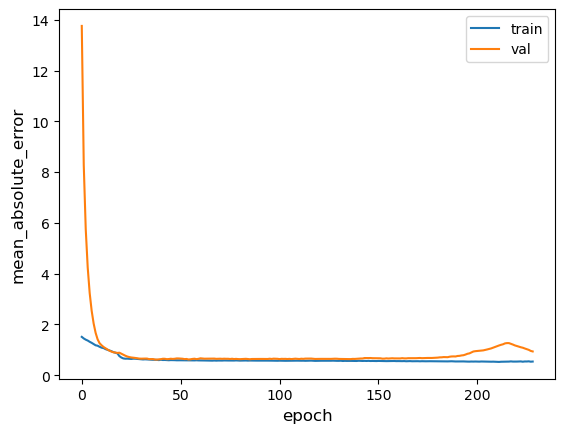

5/5 [==============================] - 0s 638us/step - loss: 4.3743 - mean_absolute_error: 1.2346
Test accuracy 1.2345795631408691
Test loss 4.374314308166504


In [28]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [29]:
y_test_pred = multi_dense_model.predict(x_test)

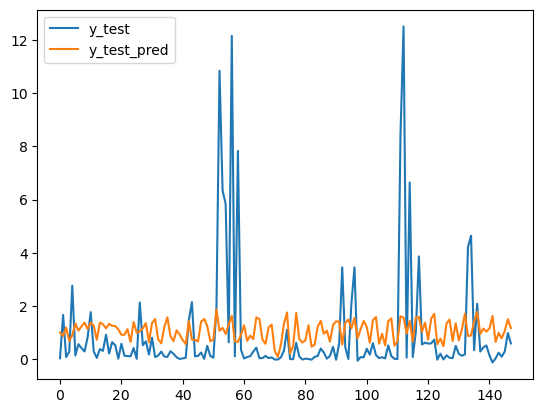

In [30]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [31]:
rmse(y_test.values, y_test_pred)

2.1686302725108466

In [32]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [33]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [34]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 3.9812 - mean_absolute_error: 1.3120 - val_loss: 188.7954 - val_mean_absolute_error: 13.3434
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 3.2001 - mean_absolute_error: 1.1967 - val_loss: 81.5119 - val_mean_absolute_error: 8.6564
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 4.3498 - mean_absolute_error: 1.2860 - val_loss: 46.1283 - val_mean_absolute_error: 6.4048
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1592 - mean_absolute_error: 1.2770 - val_loss: 29.5901 - val_mean_absolute_error: 5.0231
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6960 - mean_absolute_error: 1.2570 - val_loss: 20.5136 - val_mean_absolute_error: 4.0740
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 3.2086 - mean_absolute_error: 1.2297 - val_loss: 14.9370 - val_mean_absolute_error: 3.3661
Epoch 7/500
1

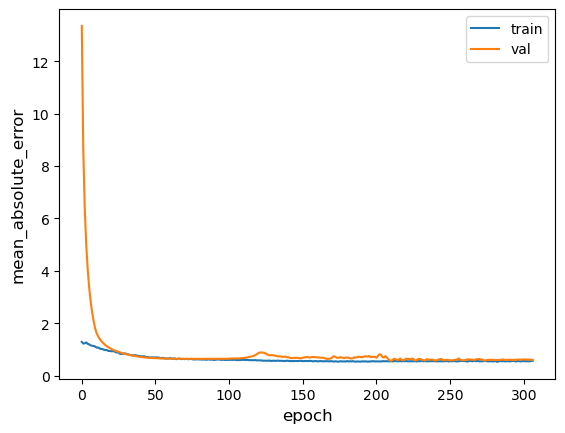

5/5 [==============================] - 0s 591us/step - loss: 4.4587 - mean_absolute_error: 0.8867
Test accuracy 0.8867355585098267
Test loss 4.4587297439575195


In [35]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [36]:
y_test_pred = multi_dense_model.predict(x_test)

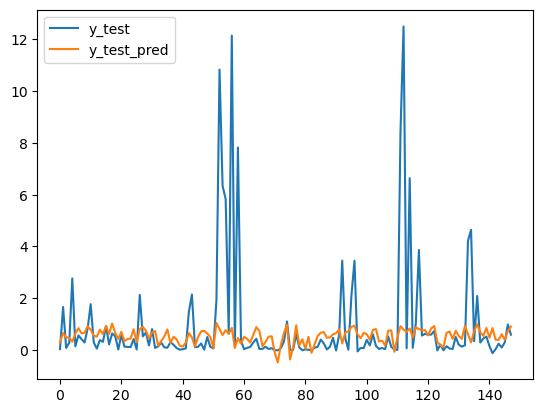

In [37]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [38]:
rmse(y_test.values, y_test_pred)

2.1854844454457383

In [39]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [40]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [41]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 10.0985 - mean_absolute_error: 2.7557 - val_loss: 1121.4744 - val_mean_absolute_error: 32.8997
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 7.9390 - mean_absolute_error: 2.3769 - val_loss: 392.9473 - val_mean_absolute_error: 19.3910
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 7.2857 - mean_absolute_error: 2.0960 - val_loss: 200.5831 - val_mean_absolute_error: 13.7471
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 5.8026 - mean_absolute_error: 2.0880 - val_loss: 118.0013 - val_mean_absolute_error: 10.4285
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 6.0220 - mean_absolute_error: 2.0625 - val_loss: 74.7937 - val_mean_absolute_error: 8.1840
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 5.7756 - mean_absolute_error: 1.9649 - val_loss: 49.5251 - val_mean_absolute_error: 6.5332
Epoch

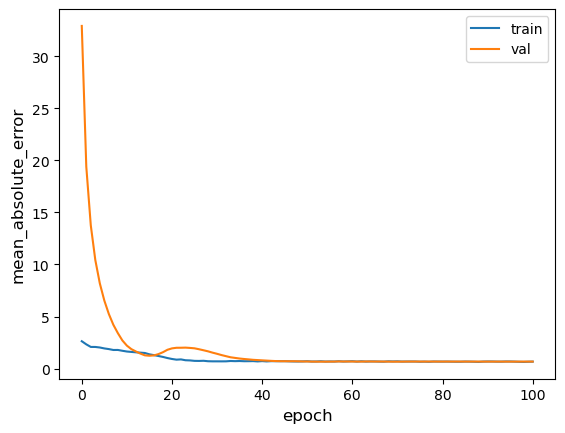

5/5 [==============================] - 0s 577us/step - loss: 4.5876 - mean_absolute_error: 0.9530
Test accuracy 0.9530187845230103
Test loss 4.587581157684326


In [42]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [43]:
y_test_pred = multi_dense_model.predict(x_test)

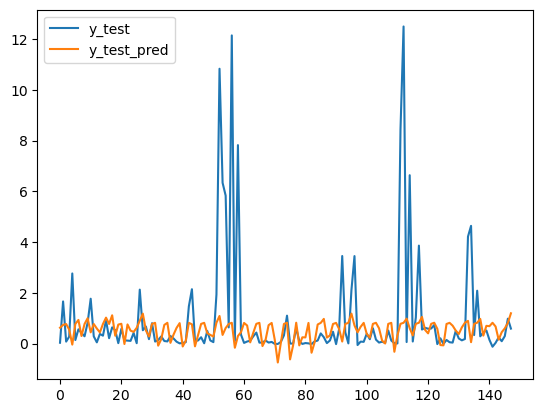

In [46]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [47]:
rmse(y_test.values, y_test_pred)

2.19944404503214

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
26/26 [==============================] - 0s 5ms/step - loss: 4.1758 - mean_absolute_error: 1.2544 - val_loss: 160.8044 - val_mean_absolute_error: 12.4532
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 4.1329 - mean_absolute_error: 1.1684 - val_loss: 47.8449 - val_mean_absolute_error: 6.7112
Epoch 3/500
26/26 [==============================] - 0s 2ms/step - loss: 2.2924 - mean_absolute_error: 1.0290 - val_loss: 18.0173 - val_mean_absolute_error: 4.0454
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 1.7481 - mean_absolute_error: 0.8704 - val_loss: 8.9757 - val_mean_absolute_error: 2.7701
Epoch 5/500
26/26 [==============================] - 0s 2ms/step - loss: 1.8484 - mean_absolute_error: 0.8204 - val_loss: 5.7447 - val_mean_absolute_error: 2.1296
Epoch 6/500
26/26 [==============================] - 0s 2ms/step - loss: 2.1682 - mean_absolute_error: 0.8518 - val_loss: 4.2736 - val_mean_absolute_error: 1.7649
Epoch 7/500
26/26

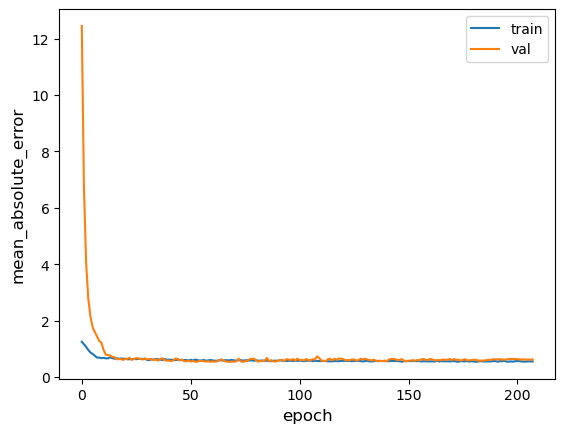

5/5 [==============================] - 0s 635us/step - loss: 4.3798 - mean_absolute_error: 0.9182
Test accuracy 0.9182432889938354
Test loss 4.379818916320801


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_pred = multi_dense_model.predict(x_test)

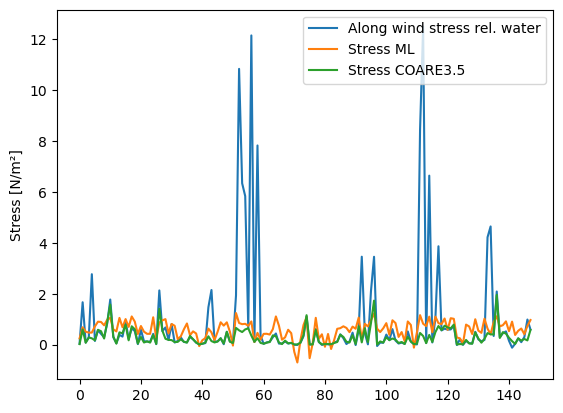

In [53]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [54]:
rmse(y_test.values, y_test_pred)

2.186471935150078

In [69]:
rmse(y_test.values, c_test.values)

2.1592411098777693

In [70]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [71]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [72]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 14ms/step - loss: 4.4646 - mean_absolute_error: 1.8118 - val_loss: 353.3770 - val_mean_absolute_error: 18.2164
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 3.9039 - mean_absolute_error: 1.6391 - val_loss: 133.6230 - val_mean_absolute_error: 11.0732
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 3.7199 - mean_absolute_error: 1.5935 - val_loss: 67.0425 - val_mean_absolute_error: 7.7182
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 4.5439 - mean_absolute_error: 1.5598 - val_loss: 37.7964 - val_mean_absolute_error: 5.6643
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 4.6850 - mean_absolute_error: 1.5177 - val_loss: 23.0236 - val_mean_absolute_error: 4.2827
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 2.8237 - mean_absolute_error: 1.3357 - val_loss: 14.7596 - val_mean_absolute_error: 3.2790
Epoch 7/500

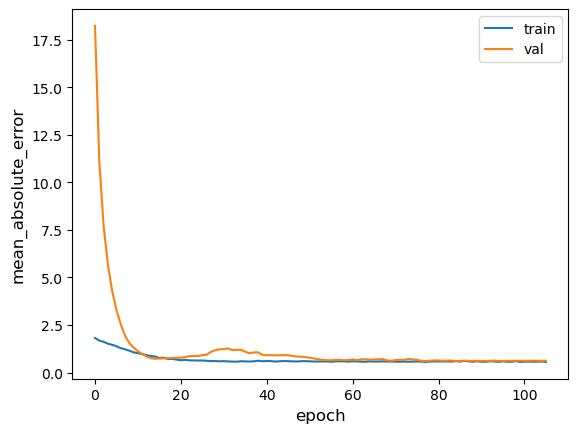

5/5 [==============================] - 0s 827us/step - loss: 4.3040 - mean_absolute_error: 0.9360
Test accuracy 0.9360388517379761
Test loss 4.303964614868164


In [73]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [74]:
y_test_pred = multi_dense_model.predict(x_test)

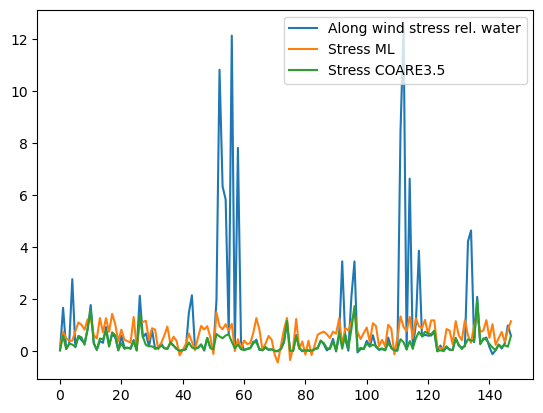

In [75]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [76]:
rmse(y_test.values, y_test_pred)

2.1931271267766026

In [81]:
rmse(y_test.values, c_test.values)

2.1592411098777693

In [82]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [83]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [84]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 16ms/step - loss: 2.5072 - mean_absolute_error: 1.2999 - val_loss: 2.1639 - val_mean_absolute_error: 0.5392
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 3.0591 - mean_absolute_error: 1.2597 - val_loss: 2.0805 - val_mean_absolute_error: 0.5356
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0866 - mean_absolute_error: 1.1923 - val_loss: 2.0268 - val_mean_absolute_error: 0.5501
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 4.2897 - mean_absolute_error: 1.2351 - val_loss: 1.9898 - val_mean_absolute_error: 0.5696
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0204 - mean_absolute_error: 1.0542 - val_loss: 1.9616 - val_mean_absolute_error: 0.5856
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5754 - mean_absolute_error: 1.0034 - val_loss: 1.9370 - val_mean_absolute_error: 0.5924
Epoch 7/500
13/13 [==

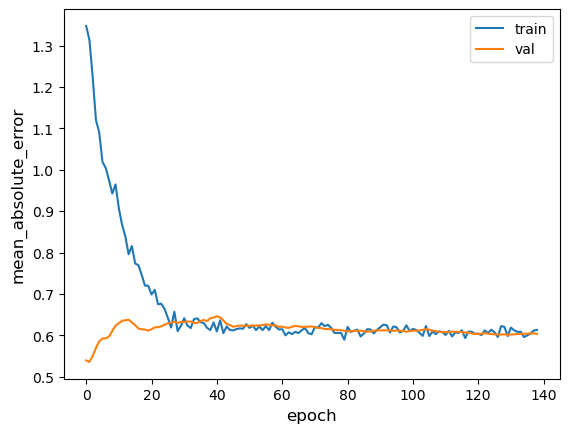

5/5 [==============================] - 0s 702us/step - loss: 4.7150 - mean_absolute_error: 0.9023
Test accuracy 0.9023360013961792
Test loss 4.715010643005371


In [85]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [86]:
y_test_pred = multi_dense_model.predict(x_test)

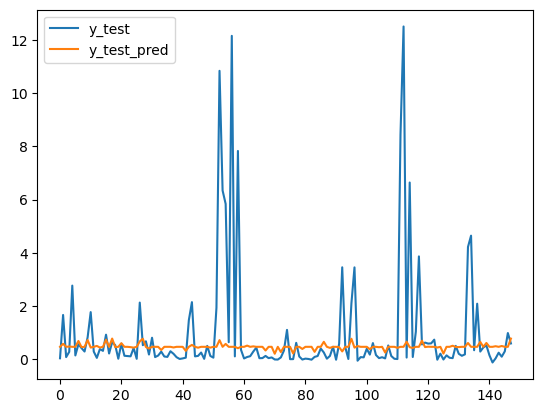

In [87]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [88]:
rmse(y_test.values, y_test_pred)

2.183976508668668

In [89]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [90]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [91]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 5.8011 - mean_absolute_error: 1.5679 - val_loss: 462.4568 - val_mean_absolute_error: 20.6622
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 3.5376 - mean_absolute_error: 1.4433 - val_loss: 150.0681 - val_mean_absolute_error: 11.3640
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 4.3461 - mean_absolute_error: 1.4343 - val_loss: 65.1120 - val_mean_absolute_error: 7.0575
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 3.9073 - mean_absolute_error: 1.2600 - val_loss: 33.3401 - val_mean_absolute_error: 4.5353
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 5.2687 - mean_absolute_error: 1.2668 - val_loss: 19.2667 - val_mean_absolute_error: 3.5932
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 2.6322 - mean_absolute_error: 1.0811 - val_loss: 11.9302 - val_mean_absolute_error: 2.7769
Epoch 7/500


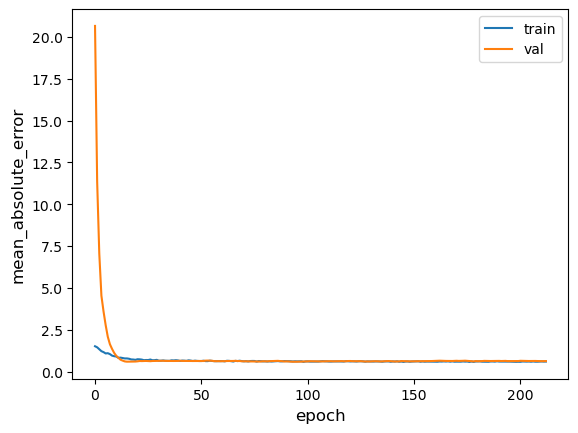

5/5 [==============================] - 0s 867us/step - loss: 4.6731 - mean_absolute_error: 0.9119
Test accuracy 0.9119337797164917
Test loss 4.6731462478637695


In [92]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [93]:
y_test_pred = multi_dense_model.predict(x_test)

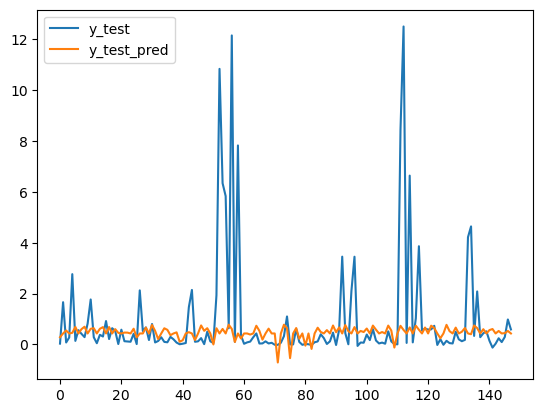

In [94]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [95]:
rmse(y_test.values, y_test_pred)

2.191927684477309

In [96]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [97]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [98]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
26/26 [==============================] - 1s 6ms/step - loss: 3.1416 - mean_absolute_error: 1.3259 - val_loss: 2.1869 - val_mean_absolute_error: 0.5431
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 2.9210 - mean_absolute_error: 1.2212 - val_loss: 2.1972 - val_mean_absolute_error: 0.5462
Epoch 3/500
26/26 [==============================] - 0s 2ms/step - loss: 2.6972 - mean_absolute_error: 1.0786 - val_loss: 2.1593 - val_mean_absolute_error: 0.5256
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 2.2391 - mean_absolute_error: 0.9857 - val_loss: 2.0797 - val_mean_absolute_error: 0.4973
Epoch 5/500
26/26 [==============================] - 0s 2ms/step - loss: 2.8109 - mean_absolute_error: 0.9298 - val_loss: 2.0103 - val_mean_absolute_error: 0.5038
Epoch 6/500
26/26 [==============================] - 0s 2ms/step - loss: 2.6901 - mean_absolute_error: 0.8279 - val_loss: 1.9319 - val_mean_absolute_error: 0.5479
Epoch 7/500
26/26 [===

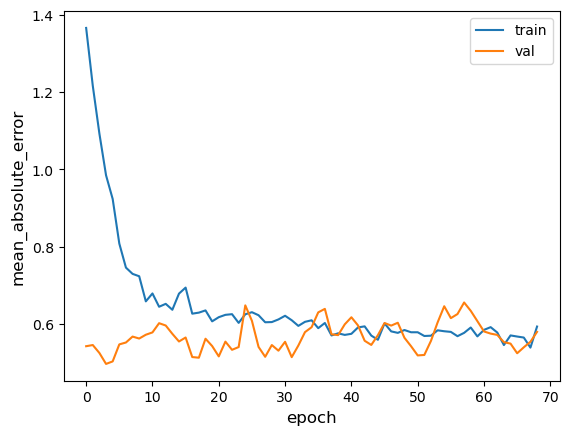

5/5 [==============================] - 0s 678us/step - loss: 4.4810 - mean_absolute_error: 0.8650
Test accuracy 0.8650153875350952
Test loss 4.481021881103516


In [99]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [100]:
y_test_pred = multi_dense_model.predict(x_test)

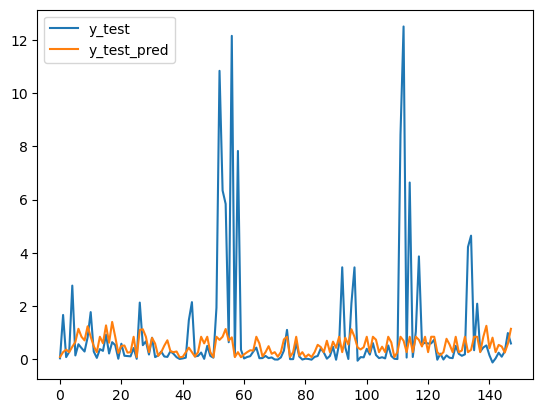

In [101]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [102]:
rmse(y_test.values, y_test_pred)

2.1961970662562904

# __________________________________________________

# Using only s0_norm

In [103]:
predictor_variables = ['s0_norm']

In [104]:
x = df[predictor_variables]
x

,s0_norm
0,-8.857191
1,-7.177506
2,-11.449438
3,-7.653141
4,-14.319081
...,...
730,-8.338825
731,-7.312949
732,-10.154485
733,-9.742783


In [105]:
y = -  df['UWr'] * df['rhoair']
y

0      0.406533
1      0.086024
2     -0.000344
3      0.151889
4      0.023080
         ...   
730    0.244808
731    0.095376
732    0.295363
733    0.984020
734    0.592159
Length: 728, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [106]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [107]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [108]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [109]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [110]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 8ms/step - loss: 129.7795 - mean_absolute_error: 10.8613 - val_loss: 112.9709 - val_mean_absolute_error: 10.2271
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 118.5599 - mean_absolute_error: 10.4489 - val_loss: 110.1119 - val_mean_absolute_error: 10.0944
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 121.8196 - mean_absolute_error: 10.5110 - val_loss: 107.2830 - val_mean_absolute_error: 9.9614
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 114.8067 - mean_absolute_error: 10.2508 - val_loss: 104.5217 - val_mean_absolute_error: 9.8298
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 114.1382 - mean_absolute_error: 10.2596 - val_loss: 101.7887 - val_mean_absolute_error: 9.6979
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 113.6090 - mean_absolute_error: 10.1481 - val_loss: 99.1217 - val_mean_absolute_error

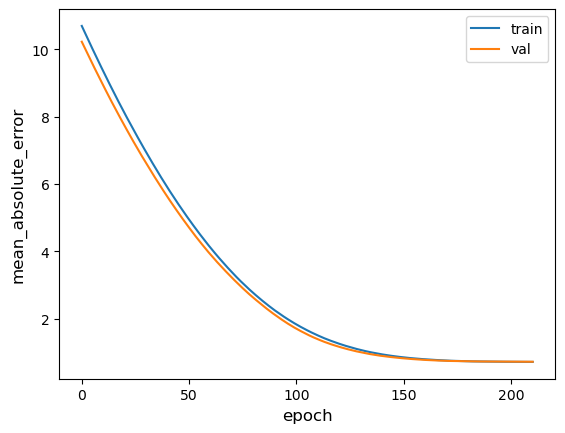

5/5 [==============================] - 0s 838us/step - loss: 5.3963 - mean_absolute_error: 1.0407
Test accuracy 1.040732502937317
Test loss 5.396254539489746


In [111]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [112]:
y_test_pred = multi_dense_model.predict(x_test)

In [113]:
np.mean(y_test)

0.9405065519903006

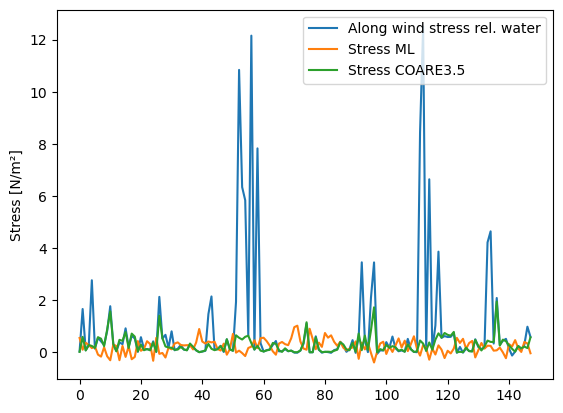

In [114]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [115]:
rmse(y_test.values, y_test_pred)

2.2666360652460216

In [116]:
rmse(y_test.values, c_test)

2.1592411098777693

# Other experiments

In [117]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [118]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [119]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 11ms/step - loss: 2.0897 - mean_absolute_error: 0.8835 - val_loss: 8.4927 - val_mean_absolute_error: 2.5776
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3675 - mean_absolute_error: 0.8062 - val_loss: 6.7142 - val_mean_absolute_error: 2.2070
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 4.5964 - mean_absolute_error: 0.9244 - val_loss: 5.3531 - val_mean_absolute_error: 1.8747
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3099 - mean_absolute_error: 0.8051 - val_loss: 4.3059 - val_mean_absolute_error: 1.5721
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 1.6717 - mean_absolute_error: 0.7635 - val_loss: 3.4527 - val_mean_absolute_error: 1.2743
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0410 - mean_absolute_error: 0.7900 - val_loss: 2.8653 - val_mean_absolute_error: 1.0199
Epoch 7/500
13/13 [==

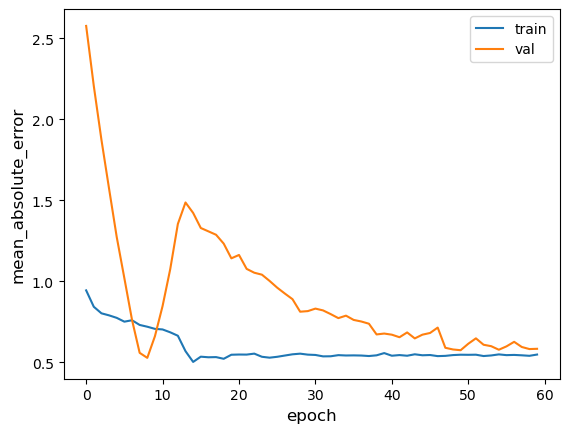

5/5 [==============================] - 0s 615us/step - loss: 4.4763 - mean_absolute_error: 0.9110
Test accuracy 0.9110187888145447
Test loss 4.476314067840576


In [120]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [121]:
y_test_pred = multi_dense_model.predict(x_test)

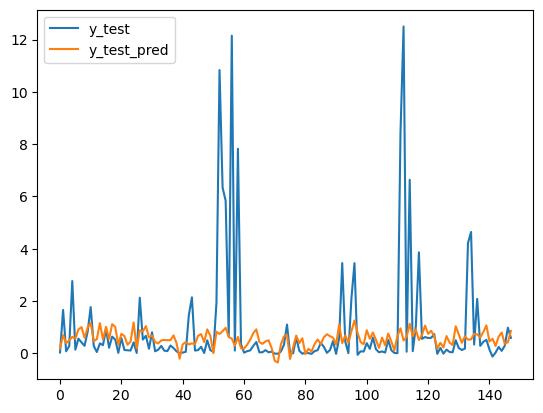

In [122]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [123]:
rmse(y_test.values, y_test_pred)

2.184165269484509

In [124]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [125]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [126]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 2.1855 - mean_absolute_error: 0.4614 - val_loss: 2.2189 - val_mean_absolute_error: 0.5613
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0522 - mean_absolute_error: 0.4837 - val_loss: 2.1807 - val_mean_absolute_error: 0.5469
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 2.1475 - mean_absolute_error: 0.5201 - val_loss: 2.1470 - val_mean_absolute_error: 0.5390
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1013 - mean_absolute_error: 0.5116 - val_loss: 2.1170 - val_mean_absolute_error: 0.5365
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 1.8135 - mean_absolute_error: 0.4728 - val_loss: 2.0905 - val_mean_absolute_error: 0.5373
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 1.1027 - mean_absolute_error: 0.4007 - val_loss: 2.0673 - val_mean_absolute_error: 0.5408
Epoch 7/500
13/13 [==

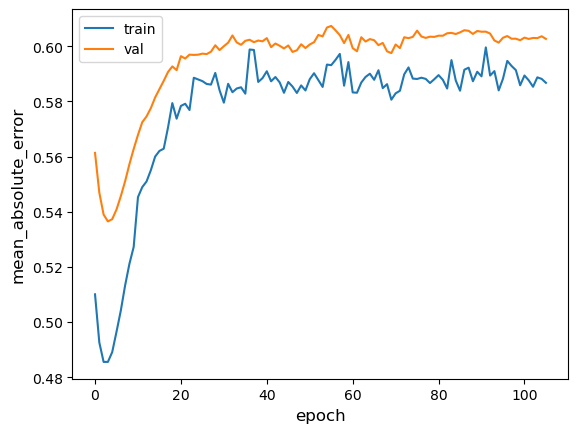

5/5 [==============================] - 0s 667us/step - loss: 4.8292 - mean_absolute_error: 0.9026
Test accuracy 0.9026104807853699
Test loss 4.829161167144775


In [127]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [128]:
y_test_pred = multi_dense_model.predict(x_test)

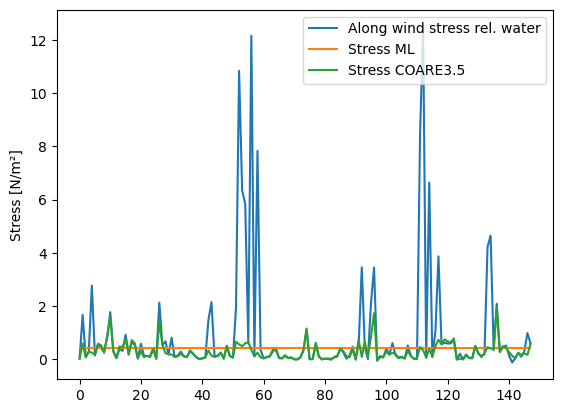

In [129]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [130]:
rmse(y_test.values, y_test_pred)

2.197535292889399

In [133]:
rmse(c_test.values, y_test.values)

2.1592411098777693

In [134]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [135]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [136]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 10ms/step - loss: 1.8220 - mean_absolute_error: 0.4334 - val_loss: 2.2130 - val_mean_absolute_error: 0.5588
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9778 - mean_absolute_error: 0.4899 - val_loss: 2.1708 - val_mean_absolute_error: 0.5442
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5575 - mean_absolute_error: 0.4503 - val_loss: 2.1328 - val_mean_absolute_error: 0.5375
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 1.4690 - mean_absolute_error: 0.4887 - val_loss: 2.0984 - val_mean_absolute_error: 0.5365
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 1.4745 - mean_absolute_error: 0.4532 - val_loss: 2.0748 - val_mean_absolute_error: 0.5395
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5065 - mean_absolute_error: 0.5391 - val_loss: 2.0535 - val_mean_absolute_error: 0.5438
Epoch 7/500
13/13 [==

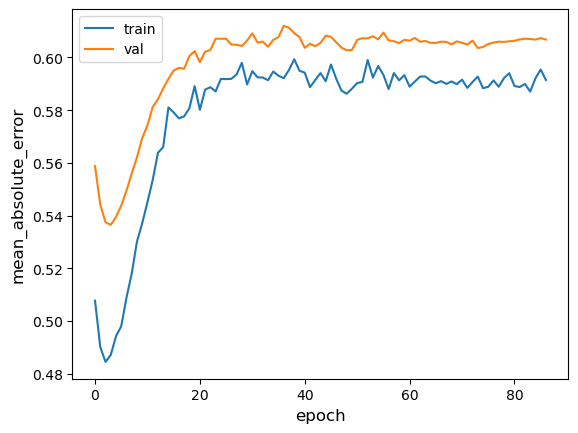

5/5 [==============================] - 0s 635us/step - loss: 4.8197 - mean_absolute_error: 0.9050
Test accuracy 0.9050373435020447
Test loss 4.81966495513916


In [137]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [138]:
y_test_pred = multi_dense_model.predict(x_test)

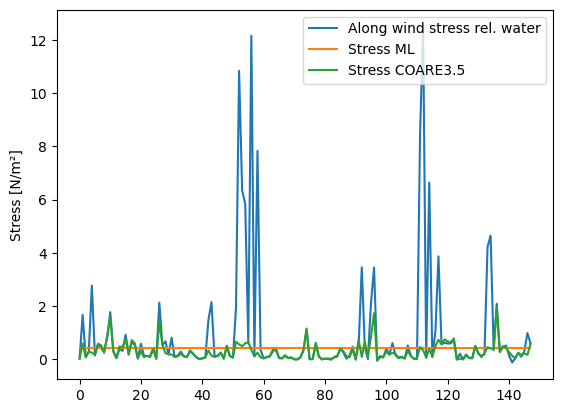

In [139]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [140]:
rmse(y_test.values, y_test_pred)

2.195373464531862

In [142]:
rmse(c_test.values, y_test.values)

2.1592411098777693

In [143]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [144]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [145]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
26/26 [==============================] - 1s 5ms/step - loss: 7.7587 - mean_absolute_error: 1.9351 - val_loss: 17.7151 - val_mean_absolute_error: 3.9135
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 7.0836 - mean_absolute_error: 1.8787 - val_loss: 9.2195 - val_mean_absolute_error: 2.7011
Epoch 3/500
26/26 [==============================] - 0s 2ms/step - loss: 7.1433 - mean_absolute_error: 1.8026 - val_loss: 5.1358 - val_mean_absolute_error: 1.8361
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 5.8414 - mean_absolute_error: 1.7210 - val_loss: 3.3176 - val_mean_absolute_error: 1.2495
Epoch 5/500
26/26 [==============================] - 0s 2ms/step - loss: 5.5288 - mean_absolute_error: 1.5598 - val_loss: 3.2211 - val_mean_absolute_error: 1.0315
Epoch 6/500
26/26 [==============================] - 0s 2ms/step - loss: 3.2098 - mean_absolute_error: 1.1118 - val_loss: 3.3756 - val_mean_absolute_error: 1.0677
Epoch 7/500
26/26 [==

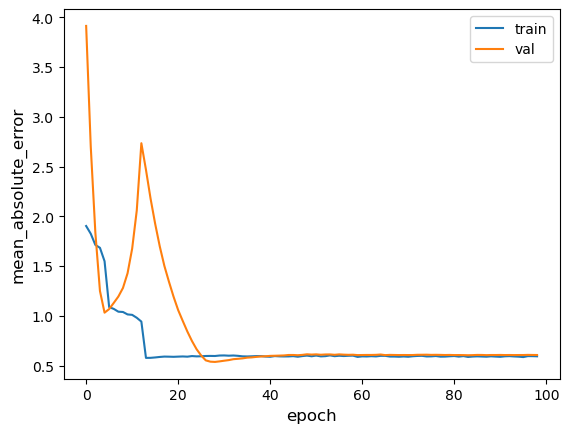

5/5 [==============================] - 0s 903us/step - loss: 4.8216 - mean_absolute_error: 0.9045
Test accuracy 0.9045387506484985
Test loss 4.821601867675781


In [146]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [147]:
y_test_pred = multi_dense_model.predict(x_test)

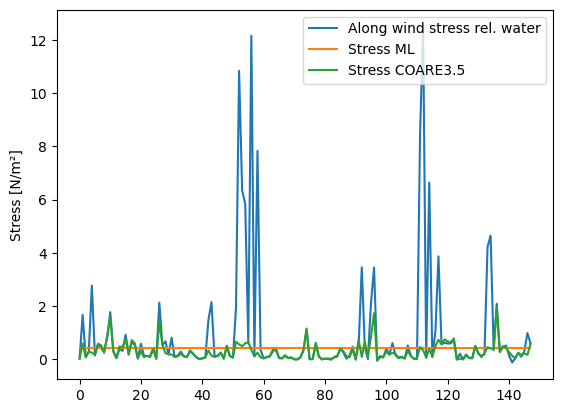

In [148]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [149]:
rmse(y_test.values, y_test_pred)

2.195814762597027

In [150]:
rmse(y_test.values, c_test)

2.1592411098777693

In [151]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [152]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [153]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 1.6195 - mean_absolute_error: 0.5811 - val_loss: 5.2536 - val_mean_absolute_error: 2.0281
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8438 - mean_absolute_error: 0.4658 - val_loss: 2.9154 - val_mean_absolute_error: 1.3067
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7976 - mean_absolute_error: 0.5319 - val_loss: 2.1631 - val_mean_absolute_error: 0.8885
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3992 - mean_absolute_error: 0.4996 - val_loss: 2.0534 - val_mean_absolute_error: 0.6529
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 1.8589 - mean_absolute_error: 0.5330 - val_loss: 2.1475 - val_mean_absolute_error: 0.5583
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4897 - mean_absolute_error: 0.4830 - val_loss: 2.1990 - val_mean_absolute_error: 0.5494
Epoch 7/500
13/13 [==

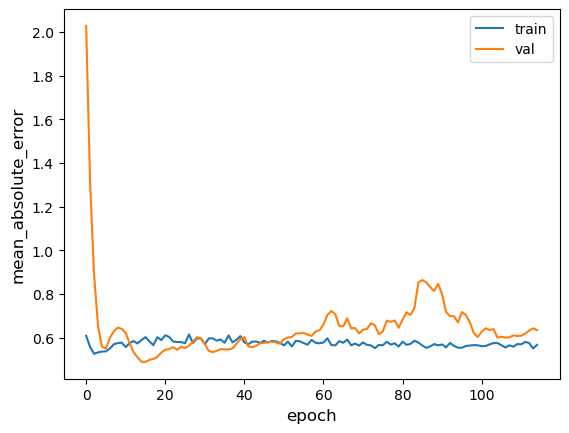

5/5 [==============================] - 0s 859us/step - loss: 4.4124 - mean_absolute_error: 0.9592
Test accuracy 0.9592177867889404
Test loss 4.412388324737549


In [154]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [155]:
y_test_pred = multi_dense_model.predict(x_test)

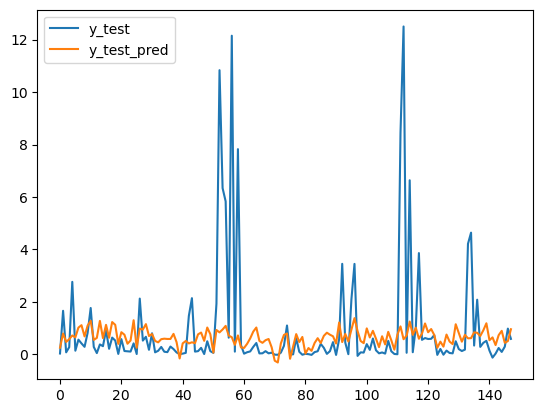

In [156]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [157]:
rmse(y_test.values, y_test_pred)

2.1730245915190216

In [158]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [159]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [160]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 11ms/step - loss: 3.3325 - mean_absolute_error: 0.8292 - val_loss: 2.2190 - val_mean_absolute_error: 0.5614
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0756 - mean_absolute_error: 0.6799 - val_loss: 2.1848 - val_mean_absolute_error: 0.5482
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1563 - mean_absolute_error: 0.6362 - val_loss: 2.1570 - val_mean_absolute_error: 0.5409
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 4.0133 - mean_absolute_error: 0.7710 - val_loss: 2.1367 - val_mean_absolute_error: 0.5378
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4635 - mean_absolute_error: 0.5236 - val_loss: 2.1182 - val_mean_absolute_error: 0.5358
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5727 - mean_absolute_error: 0.6183 - val_loss: 2.0971 - val_mean_absolute_error: 0.5327
Epoch 7/500
13/13 [==

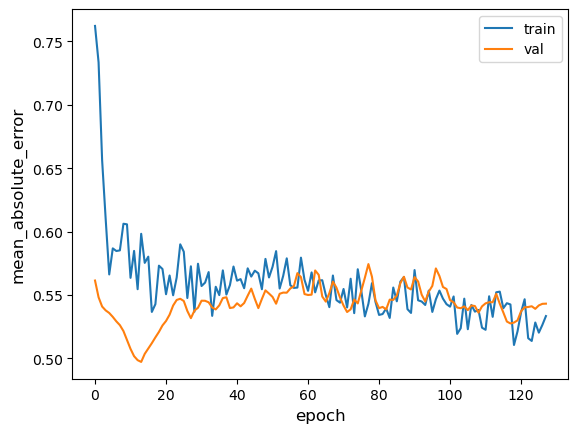

5/5 [==============================] - 0s 864us/step - loss: 4.4314 - mean_absolute_error: 0.8891
Test accuracy 0.889146625995636
Test loss 4.431370258331299


In [161]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [162]:
y_test_pred = multi_dense_model.predict(x_test)

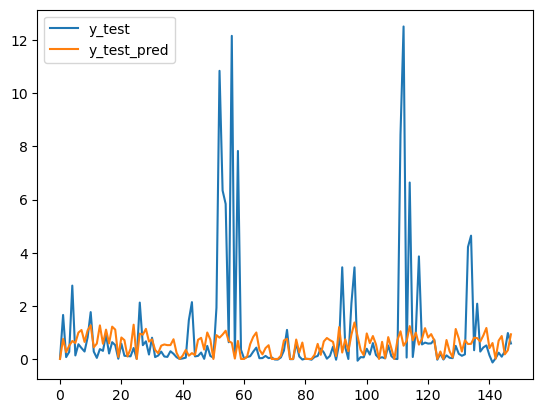

In [163]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [164]:
rmse(y_test.values, y_test_pred)

2.195941806213303

In [165]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [166]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [167]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
26/26 [==============================] - 1s 9ms/step - loss: 4.2366 - mean_absolute_error: 1.3452 - val_loss: 2.1473 - val_mean_absolute_error: 0.5390
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 4.6187 - mean_absolute_error: 1.3067 - val_loss: 2.0704 - val_mean_absolute_error: 0.5405
Epoch 3/500
26/26 [==============================] - 0s 2ms/step - loss: 3.8402 - mean_absolute_error: 1.1859 - val_loss: 2.0381 - val_mean_absolute_error: 0.5517
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 2.6054 - mean_absolute_error: 0.9335 - val_loss: 1.9946 - val_mean_absolute_error: 0.5576
Epoch 5/500
26/26 [==============================] - 0s 2ms/step - loss: 2.0928 - mean_absolute_error: 0.9204 - val_loss: 1.9631 - val_mean_absolute_error: 0.5792
Epoch 6/500
26/26 [==============================] - 0s 2ms/step - loss: 5.8581 - mean_absolute_error: 1.1065 - val_loss: 1.9746 - val_mean_absolute_error: 0.6084
Epoch 7/500
26/26 [===

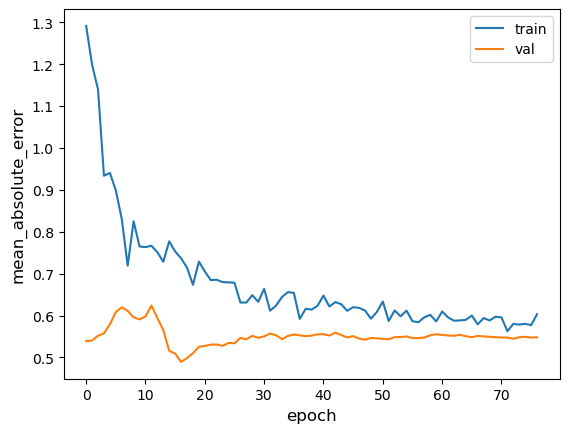

5/5 [==============================] - 0s 740us/step - loss: 4.4890 - mean_absolute_error: 0.8785
Test accuracy 0.8784570693969727
Test loss 4.489011764526367


In [168]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [169]:
y_test_pred = multi_dense_model.predict(x_test)

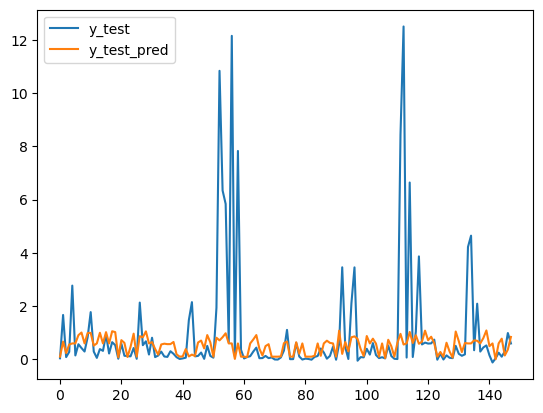

In [170]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [171]:
rmse(y_test.values, y_test_pred)

2.19377460636902

In [172]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [173]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [174]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 4.4772 - mean_absolute_error: 1.6058 - val_loss: 21.6270 - val_mean_absolute_error: 4.3892
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 4.0705 - mean_absolute_error: 1.4747 - val_loss: 13.5877 - val_mean_absolute_error: 3.3635
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 6.7133 - mean_absolute_error: 1.5571 - val_loss: 8.6926 - val_mean_absolute_error: 2.5496
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 5.5000 - mean_absolute_error: 1.4146 - val_loss: 6.0630 - val_mean_absolute_error: 1.9766
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 3.1830 - mean_absolute_error: 1.2539 - val_loss: 4.5798 - val_mean_absolute_error: 1.5698
Epoch 6/500
26/26 [==============================] - 0s 2ms/step - loss: 3.3667 - mean_absolute_error: 1.1817 - val_loss: 3.7074 - val_mean_absolute_error: 1.2741
Epoch 7/500
26/26 [=

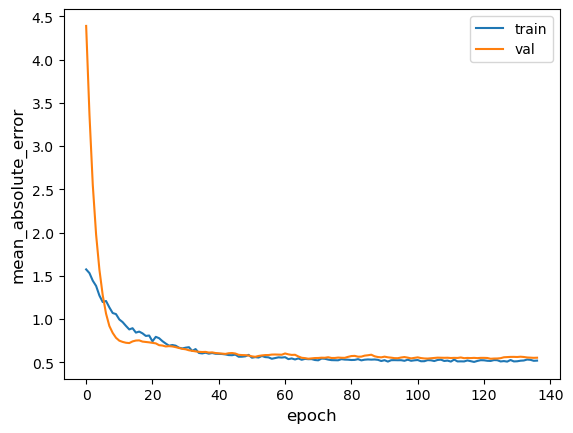

5/5 [==============================] - 0s 661us/step - loss: 4.4592 - mean_absolute_error: 0.8877
Test accuracy 0.8876523375511169
Test loss 4.459165573120117


In [175]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [176]:
y_test_pred = multi_dense_model.predict(x_test)

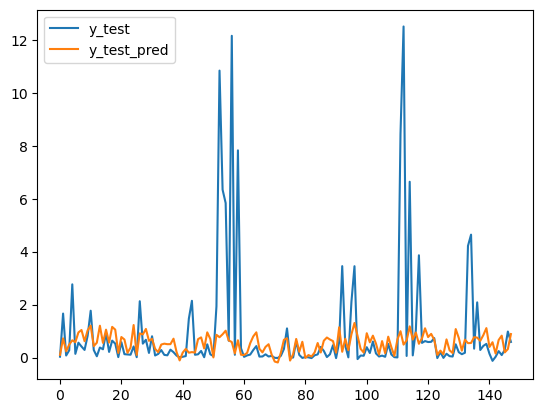

In [177]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [178]:
rmse(y_test.values, y_test_pred)

2.1938971204446243

# predictors to use for the ML and validation: extraction


ml_predictors = [
    # # electromagnetic fluxes
    "IR",
    "Solar",
    # #---------- 
    # # specific humidities
    "Q10",
    "SSQ",
    "Qair",
    # #---------- 
    # # relative humidities
    "RH",
    # "RH10",
    # #---------- 
    # # air characteristics
    # "rhoair",
    # "P10",
    # "Pair",
    # #---------- 
    # # temperatures
    "SST",
    "T10",
    # "Tair",
    "Tsea",
    # "Tseasonic",
    # "Tsonic",
    # #---------- 
    # # waves
    # "Tm",
    "Tp",
    # "cp",
    "sigH",
    "sigHDir",
    # #---------- 
    # # wind characteristics
    # "U10e",
    "U10r",
    # "Ue",
    # "Ur",
    # "Wdir",
    "Wdirr",
    # #---------- 
    # # Obukhov scaling
    "moL",
    # "moLcbrt",
    # "moLclipped",
    # "moLinv",
    # #---------- 
    # # bulk fluxes
    "lhf",
    "shf",
    # # ----------
    # # composite variables
    # 'windspeed_over_wavecp',
    # 'mismatch_winddir_wavedir',
    # 'difference_specific_humidity',
    # # ----------
    # # others
    # "WTr",
    ## "Lv",
    # "stress",
]
